In [41]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [42]:
class parabola(torch.nn.Module):
    def __init__(self, a=-1.0, b=4.0, c=3.0) -> None:
        super().__init__()
        self.a = torch.nn.Parameter(torch.tensor(a))
        self.b = torch.nn.Parameter(torch.tensor(b))
        self.c = torch.nn.Parameter(torch.tensor(c))
    
    def forward(self, x):
        return self.a*x**2 + self.b*x + self.c

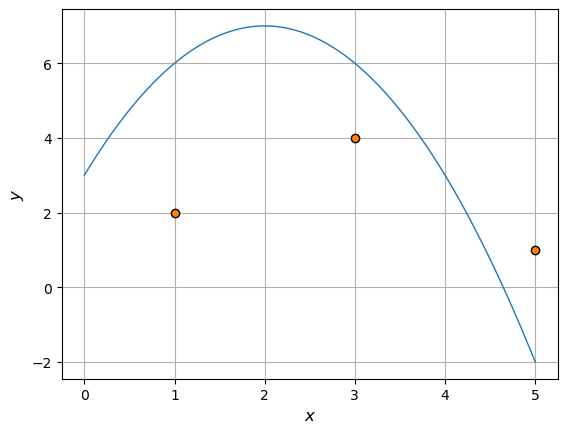

In [43]:
fig, ax = plt.subplots()
ax.set_xlabel(r"$x$", fontsize=12)
ax.set_ylabel(r"$y$", fontsize=12)
ax.grid()
parab = parabola()
xs = torch.linspace(0.0,5.0, 200)
data = torch.tensor([[1.0, 2.0],[3.0,4.0],[5.0,1.0]], requires_grad=True)
with torch.no_grad():
    ax.plot(xs, parab.forward(xs), lw=1)
    ax.plot(data[:,0], data[:,1], 'o', markeredgecolor="k")

In [44]:
steps = 10000
parab = parabola()
optimizer = torch.optim.Adam(parab.parameters()) # parab.paremeters() an inherit method that gets the parameters of nn.module
print("Weights and biases, before training:")
print(rf"a = {parab.a} b = {parab.b} c = {parab.c}")
loss_vals = []
for step in range(steps):
    optimizer.zero_grad() # We need to zero the gradient after each step, otherwise it accumulates
    loss = torch.mean((parab.forward(data[:,0])-data[:,1])**2)
    loss_vals.append(loss)
    loss.backward()
    optimizer.step()
print("Weights and biases, after training:")
print(rf"a = {parab.a} b = {parab.b} c = {parab.c}")

Weights and biases, before training:
a = Parameter containing:
tensor(-1., requires_grad=True) b = Parameter containing:
tensor(4., requires_grad=True) c = Parameter containing:
tensor(3., requires_grad=True)
Weights and biases, after training:
a = Parameter containing:
tensor(-0.6208, requires_grad=True) b = Parameter containing:
tensor(3.4725, requires_grad=True) c = Parameter containing:
tensor(-0.8407, requires_grad=True)


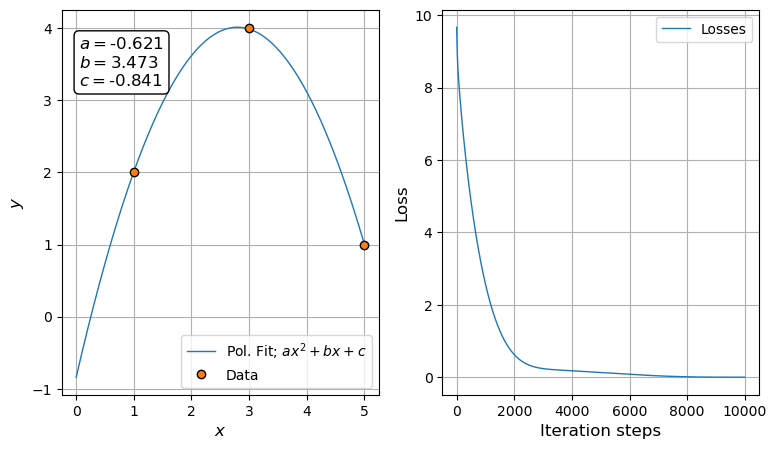

In [66]:
fig, axs = plt.subplots(1,2, figsize=(9,5))

axs[0].set_xlabel(r"$x$", fontsize=12)
axs[0].set_ylabel(r"$y$", fontsize=12)

axs[1].set_ylabel("Loss", fontsize=12)
axs[1].set_xlabel("Iteration steps", fontsize=12)


axs[0].annotate(text=rf"$a = ${round(parab.a.item(), 3)}"+"\n"rf"$b = ${round(parab.b.item(), 3)}"+"\n"rf"$c = ${round(parab.c.item(), 3)}", xy=(0.05, 3.2), fontsize=12, bbox=dict(boxstyle="round", fc="w"))

xs = torch.linspace(0.0,5.0, 200)
step_plots = torch.linspace(0.0, len(loss_vals), len(loss_vals))
data = torch.tensor([[1.0, 2.0],[3.0,4.0],[5.0,1.0]], requires_grad=True)
with torch.no_grad():
    axs[0].plot(xs, parab.forward(xs), lw=1, label=r"Pol. Fit; $ax^2+bx+c$")
    axs[0].plot(data[:,0], data[:,1], 'o', markeredgecolor="k", label="Data")
    axs[1].plot(step_plots, loss_vals, label="Losses", lw=1)

for ax in axs:
    ax.grid()
    ax.legend()


In [67]:
torch.round(parab.a.data, decimals=3)
d = np.round(parab.a.data.numpy(), 3)

In [68]:
steps = 10000
parab = parabola()
optimizer = torch.optim.Adam(parab.parameters())
print("Weights and biases, before training:")
print(rf"a = {parab.a} b = {parab.b} c = {parab.c}")
loss_vals = []
loss_func = torch.nn.MSELoss() #Same loss function just implemented in torch instead
for step in range(steps):
    optimizer.zero_grad() 
    loss = loss_func(parab.forward(data[:,0]), data[:,1])
    loss_vals.append(loss)
    loss.backward()
    optimizer.step()
print("Weights and biases, after training:")
print(rf"a = {parab.a} b = {parab.b} c = {parab.c}")

Weights and biases, before training:
a = Parameter containing:
tensor(-1., requires_grad=True) b = Parameter containing:
tensor(4., requires_grad=True) c = Parameter containing:
tensor(3., requires_grad=True)
Weights and biases, after training:
a = Parameter containing:
tensor(-0.6208, requires_grad=True) b = Parameter containing:
tensor(3.4725, requires_grad=True) c = Parameter containing:
tensor(-0.8407, requires_grad=True)


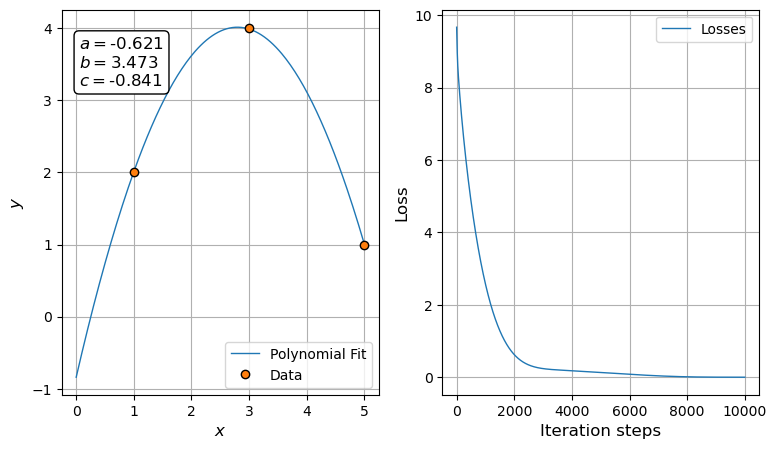

In [70]:
fig, axs = plt.subplots(1,2, figsize=(9,5))

axs[0].set_xlabel(r"$x$", fontsize=12)
axs[0].set_ylabel(r"$y$", fontsize=12)

axs[1].set_ylabel("Loss", fontsize=12)
axs[1].set_xlabel("Iteration steps", fontsize=12)

axs[0].annotate(text=rf"$a = ${round(parab.a.item(), 3)}"+"\n"rf"$b = ${round(parab.b.item(), 3)}"+"\n"rf"$c = ${round(parab.c.item(), 3)}", xy=(0.05, 3.2), fontsize=12, bbox=dict(boxstyle="round", fc="w"))

xs = torch.linspace(0.0,5.0, 200)
step_plots = torch.linspace(0.0, len(loss_vals), len(loss_vals))
data = torch.tensor([[1.0, 2.0],[3.0,4.0],[5.0,1.0]], requires_grad=True)
with torch.no_grad():
    axs[0].plot(xs, parab.forward(xs), lw=1, label="Polynomial Fit")
    axs[0].plot(data[:,0], data[:,1], 'o', markeredgecolor="k", label="Data")
    axs[1].plot(step_plots, loss_vals, label="Losses", lw=1)

for ax in axs:
    ax.grid()
    ax.legend()


In [71]:
class gaussian(torch.nn.Module):
    def __init__(self, A=1.0, x0=2.0, sigma=0.5) -> None:
        super().__init__()
        self.x0 = torch.nn.Parameter(torch.tensor(x0))
        self.sigma = torch.nn.Parameter(torch.tensor(sigma))
        self.A = torch.nn.Parameter(torch.tensor(A))
    
    def forward(self, xs):
        return self.A*torch.exp(-(xs-self.x0)**2/(2.0*self.sigma**2))

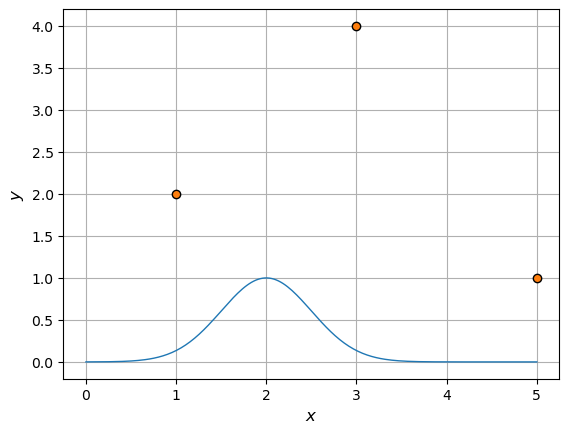

In [72]:
fig, ax = plt.subplots()
ax.grid()
ax.set_xlabel(r"$x$", fontsize=12)
ax.set_ylabel(r"$y$", fontsize=12)
gauss = gaussian()
xs = torch.linspace(0.0,5.0, 200)
data = torch.tensor([[1.0, 2.0],[3.0,4.0],[5.0,1.0]], requires_grad=True)
with torch.no_grad():
    ax.plot(xs, gauss.forward(xs), lw=1)
    ax.plot(data[:,0], data[:,1], 'o', markeredgecolor="k")

In [73]:
steps = 10000
gauss = gaussian()
optimizer = torch.optim.Adam(gauss.parameters())
print("Weights and biases, before training:")
print(rf"A = {gauss.A} x0 = {gauss.x0} $\sigma$ = {gauss.sigma}")
loss_vals = []
loss_func = torch.nn.MSELoss()
for step in range(steps):
    optimizer.zero_grad()
    loss = loss_func(gauss.forward(data[:,0]), data[:,1])
    loss_vals.append(loss)
    loss.backward()
    optimizer.step()
print("Weights and biases, after training:")
print(rf"A = {gauss.A} x0 = {gauss.x0} $\sigma$ = {gauss.sigma}")

Weights and biases, before training:
A = Parameter containing:
tensor(1., requires_grad=True) x0 = Parameter containing:
tensor(2., requires_grad=True) $\sigma$ = Parameter containing:
tensor(0.5000, requires_grad=True)
Weights and biases, after training:
A = Parameter containing:
tensor(4.1172, requires_grad=True) x0 = Parameter containing:
tensor(2.6667, requires_grad=True) $\sigma$ = Parameter containing:
tensor(1.3869, requires_grad=True)


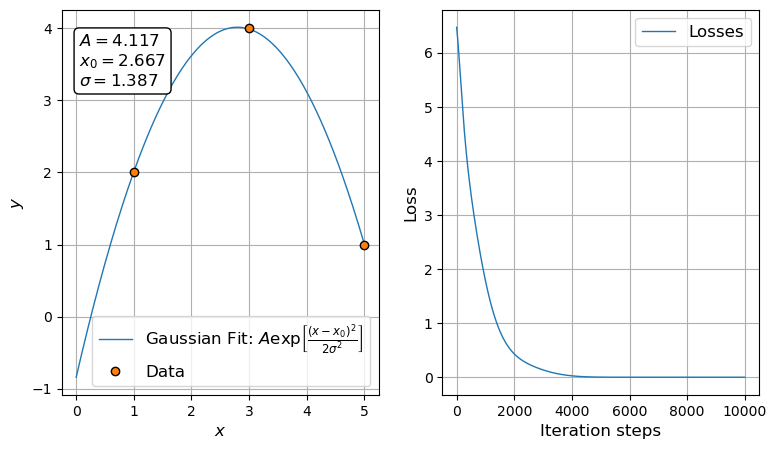

In [81]:
fig, axs = plt.subplots(1,2, figsize=(9,5))

axs[0].set_xlabel(r"$x$", fontsize=12)
axs[0].set_ylabel(r"$y$", fontsize=12)

axs[1].set_ylabel("Loss", fontsize=12)
axs[1].set_xlabel("Iteration steps", fontsize=12)
axs[0].annotate(text=rf"$A = ${round(gauss.A.item(), 3)}"+"\n"rf"$x_0 = ${round(gauss.x0.item(), 3)}"+"\n"rf"$\sigma = ${round(gauss.sigma.item(), 3)}", xy=(0.05, 3.2), fontsize=12, bbox=dict(boxstyle="round", fc="w"))
xs = torch.linspace(0.0,5.0, 200)
step_plots = torch.linspace(0.0, len(loss_vals), len(loss_vals))
data = torch.tensor([[1.0, 2.0],[3.0,4.0],[5.0,1.0]], requires_grad=True)
with torch.no_grad():
    axs[0].plot(xs, parab.forward(xs), lw=1, label=r"Gaussian Fit: $A$exp$\left[\frac{(x-x_0)^2}{2\sigma^2}\right]$")
    axs[0].plot(data[:,0], data[:,1], 'o', markeredgecolor="k", label="Data")
    axs[1].plot(step_plots, loss_vals, label="Losses", lw=1)

for ax in axs:
    ax.grid()
    ax.legend(fontsize=12)